Query GCP

```
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 29955
```

# Milestones 1

# 1. Perkenalan

Nama        : Akhdan Azmi

Batch       : FTDS Remote 015

Dataset     : Google Cloud Platform, ml_dataset: credit_card_default

Objektif    : Prediksi default_payment_next_month


# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay

# 3. Data Load

In [2]:
data = pd.read_csv('h8dsft_P1M1_Akhdan_Azmi.csv')
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [3]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# membuat copy dari dataset

df = data.copy()
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


#### Deskripsi Data

Berikut adalah deskripsi masing2 kolom:
- limit_balance: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- sex: Gender (1 = male, 2 = female)
- education_level: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
- marital_status: Marital status (0 = others, 1 = married, 2 = single, 3 = divorce)
- age : Age in years
- pay_0 : Repayment status in September, 2005
(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
- pay_2: Repayment status in August, 2005 (scale same as above)
- pay_3: Repayment status in July, 2005 (scale same as above)
- pay_4: Repayment status in June, 2005 (scale same as above)
- pay_5: Repayment status in May, 2005 (scale same as above)
- pay_6: Repayment status in April, 2005 (scale same as above)
- bill_amt_1: Amount of bill statement in September, 2005 (NT dollar)
- bill_amt_2: Amount of bill statement in August, 2005 (NT dollar)
- bill_amt_3: Amount of bill statement in July, 2005 (NT dollar)
- bill_amt_4: Amount of bill statement in June, 2005 (NT dollar)
- bill_amt_5: Amount of bill statement in May, 2005 (NT dollar)
- bill_amt_6: Amount of bill statement in April, 2005 (NT dollar)
- pay_amt_1: Amount of previous payment in September, 2005 (NT dollar)
- pay_amt_2: Amount of previous payment in August, 2005 (NT dollar)
- pay_amt_3: Amount of previous payment in July, 2005 (NT dollar)
- pay_amt_4: Amount of previous payment in June, 2005 (NT dollar)
- pay_amt_5: Amount of previous payment in May, 2005 (NT dollar)
- pay_amt_6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [5]:
# melihat profil data dengan .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Data terdiri dari 2965 baris dan 2965 kolom yang seluruhnya bertipe data integer. Data juga tidak memiliki missing value 

Kolom `pay_0` akan di rename menjadi `pay_1` agar konsisten dengan `bill_amt_` dan `pay_amt_ `. Kolom `default_payment_next_month` menjadi `def_pay` untuk mempersingkat penamaan

In [6]:
# rename kolom

df.rename(columns={'pay_0':'pay_1','default_payment_next_month':'def_pay'}, inplace=True)
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'def_pay'],
      dtype='object')

# 4. Exploratory Data Analysis

In [7]:
# Menampilkan statistik deskriptif

df.describe(include= 'all')

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Beberapa kolom terutama pada kolom2 bill_amt dan pay_amt memiliki nilai max yang terlampau jauh dari Q3 nya yang berarti kemungkinan data tersebut bersifat skewed. Untuk dapat memahami lebih baik maka perlu dilihat keseimbangan dan persebaran data masing2 kolom.

Berdasarkan deskripsi pada Bab Data Load kita mengetahui bahwa kolom `sex`, `marital_status`, and `pay_` adalah kolom kategorik non-ordinal dan untuk kolom `education_level` merupakan ordinal kategorik.

### Melihat keseimbangan dan persebaran data

In [8]:
# membuat fungsi untuk menampilkan profil persebaran data
def persebaran(data,kolom):
    
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[kolom], histtype='step', bins=25)  
    plt.axvline(data[kolom].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data[kolom].median(), color='green', linestyle='dashed', linewidth=2)

    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[kolom])

    # Menampilkan beberapa statistik deskriptif
    print(' skewness: ' + str(data[kolom].skew()))
    print(' kurtosis: ' + str(data[kolom].kurt()))
    print(' Mean: ' + str(data[kolom].mean()))
    print(' Median: ' + str(data[kolom].median()))
    print(' Min: ' + str(data[kolom].min()))
    print(' Max: ' + str(data[kolom].max()))
    print('persebaran data kolom ',kolom)

    plt.show()

# Membuat fungsi untuk menampilkan keseimbangan data klasifikasi
def keseimbangan (data, kolom):
    print('jumlah kategori pada kolom ',kolom, 'adalah= ',data[kolom].nunique())
    print( 'Jumlah masing2 value =','\n',data[kolom].value_counts())
    data[kolom].value_counts().plot(kind='bar',figsize=(20, 4))
    plt.show()

Membuat list kolom kategori dan list kolom numerik

In [9]:
# Kolom kategori
kategori= ['sex', 'education_level', 'marital_status','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','def_pay']

# Kolom numerik
numerik = ['limit_balance','age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

#### Melihat persebaran data kolom numerik

 skewness: 1.0004416437793329
 kurtosis: 0.7003286116778198
 Mean: 163369.30860033727
 Median: 140000.0
 Min: 10000
 Max: 800000
persebaran data kolom  limit_balance


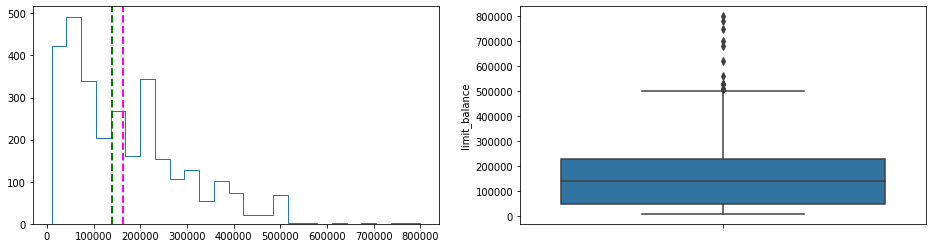

 skewness: 0.7728871800647299
 kurtosis: 0.08296262404625931
 Mean: 35.19325463743676
 Median: 34.0
 Min: 21
 Max: 69
persebaran data kolom  age


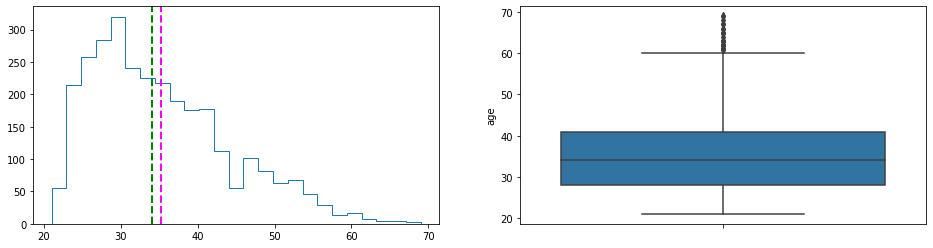

 skewness: 2.4845979515192678
 kurtosis: 8.117171757307034
 Mean: 52118.30522765598
 Median: 24257.0
 Min: -11545
 Max: 613860
persebaran data kolom  bill_amt_1


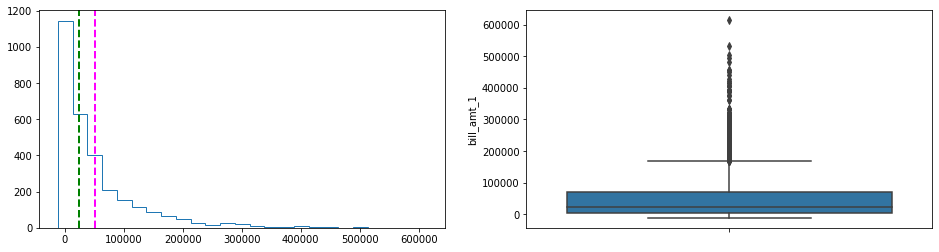

 skewness: 2.4583490250696407
 kurtosis: 7.690538300521021
 Mean: 50649.15311973019
 Median: 23111.0
 Min: -67526
 Max: 512650
persebaran data kolom  bill_amt_2


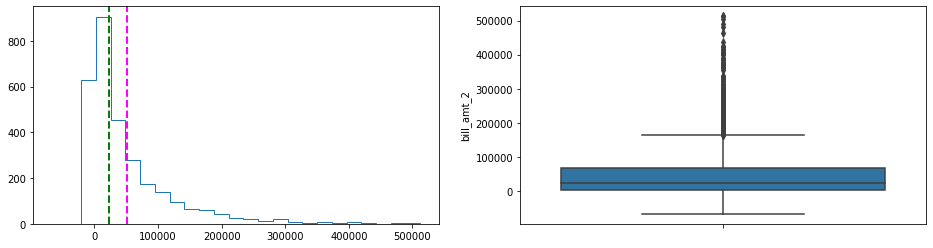

 skewness: 2.5699370031608466
 kurtosis: 8.752518995879214
 Mean: 48239.75750421585
 Median: 21520.0
 Min: -25443
 Max: 578971
persebaran data kolom  bill_amt_3


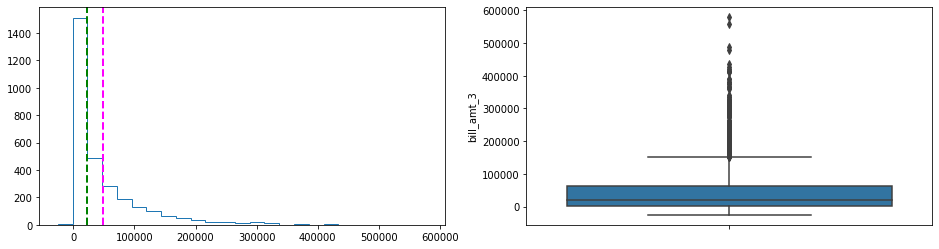

 skewness: 2.4481747375037792
 kurtosis: 7.671313319654314
 Mean: 44089.683305227656
 Median: 19894.0
 Min: -46627
 Max: 488808
persebaran data kolom  bill_amt_4


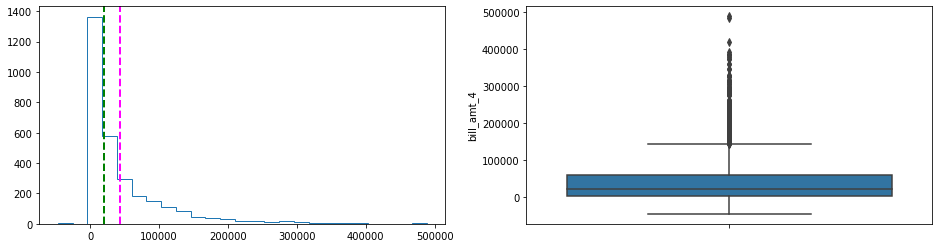

 skewness: 2.4003425345674225
 kurtosis: 7.214801641340229
 Mean: 40956.08060708263
 Median: 18814.0
 Min: -46627
 Max: 441981
persebaran data kolom  bill_amt_5


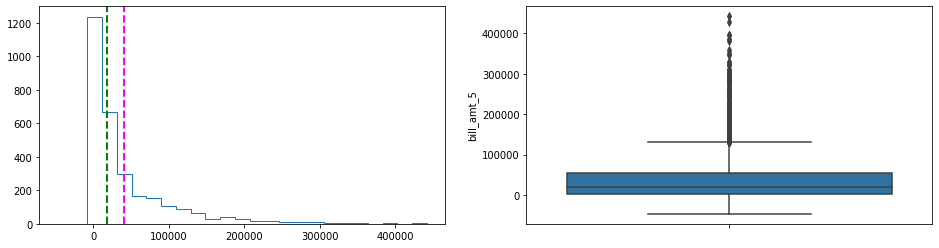

 skewness: 2.432406107849241
 kurtosis: 7.578229074880812
 Mean: 39773.07251264755
 Median: 18508.0
 Min: -73895
 Max: 436172
persebaran data kolom  bill_amt_6


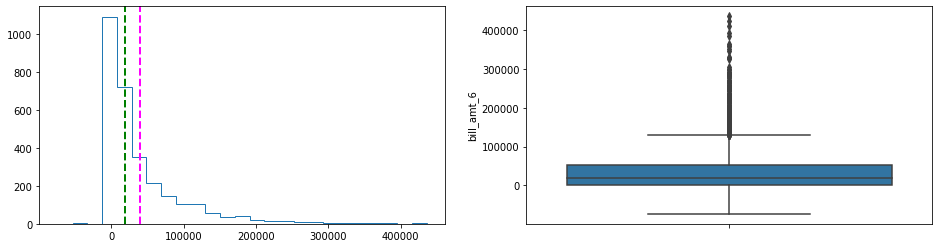

 skewness: 11.877646508452141
 kurtosis: 192.77789433692624
 Mean: 6348.902866779089
 Median: 2234.0
 Min: 0
 Max: 493358
persebaran data kolom  pay_amt_1


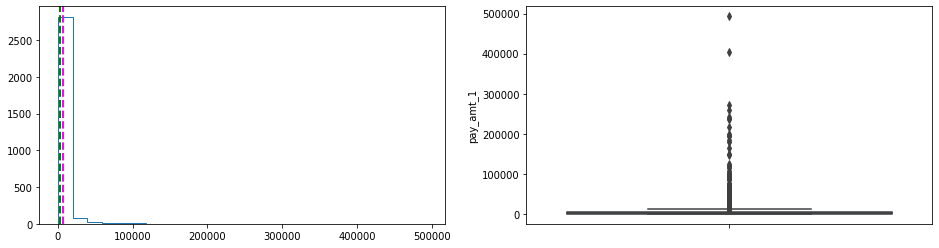

 skewness: 29.404260716921023
 kurtosis: 1138.3081280200995
 Mean: 6272.494435075885
 Median: 2175.0
 Min: 0
 Max: 1227082
persebaran data kolom  pay_amt_2


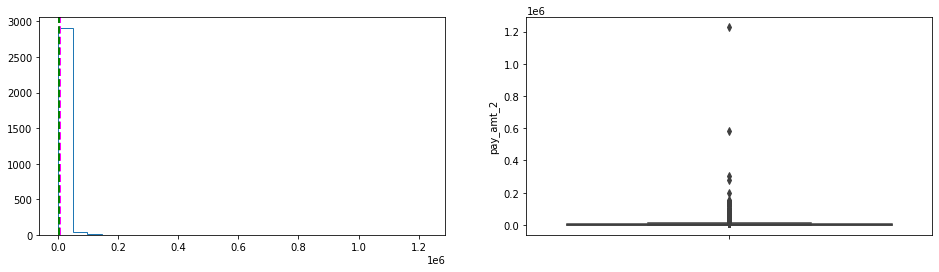

 skewness: 8.044638784580487
 kurtosis: 81.13575009761682
 Mean: 5150.497133220911
 Median: 1994.0
 Min: 0
 Max: 199209
persebaran data kolom  pay_amt_3


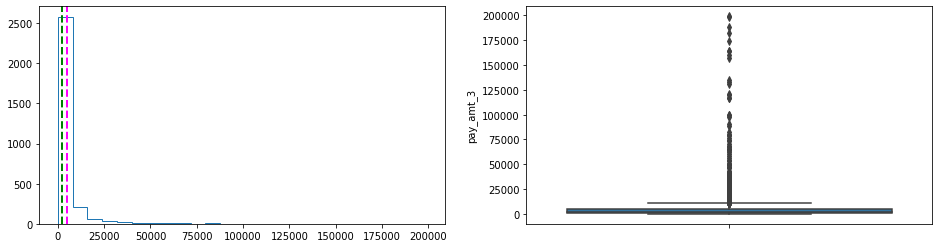

 skewness: 8.45154112454925
 kurtosis: 89.31061829983989
 Mean: 4561.3760539629
 Median: 1600.0
 Min: 0
 Max: 202076
persebaran data kolom  pay_amt_4


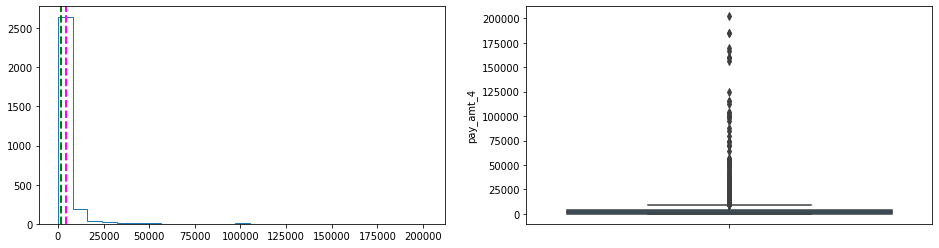

 skewness: 11.468889852065466
 kurtosis: 178.87690484114492
 Mean: 4913.286677908937
 Median: 1646.0
 Min: 0
 Max: 388071
persebaran data kolom  pay_amt_5


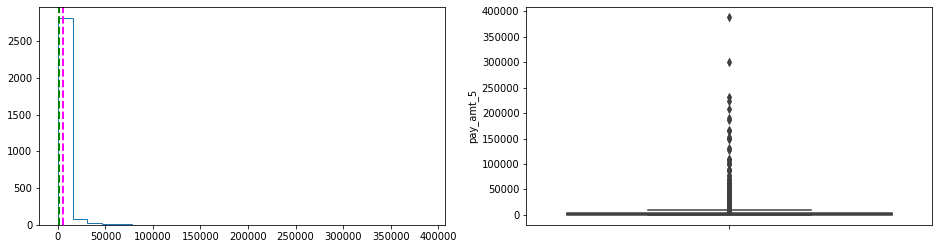

 skewness: 9.760184438993202
 kurtosis: 143.31157412157123
 Mean: 5382.701517706577
 Median: 1615.0
 Min: 0
 Max: 403500
persebaran data kolom  pay_amt_6


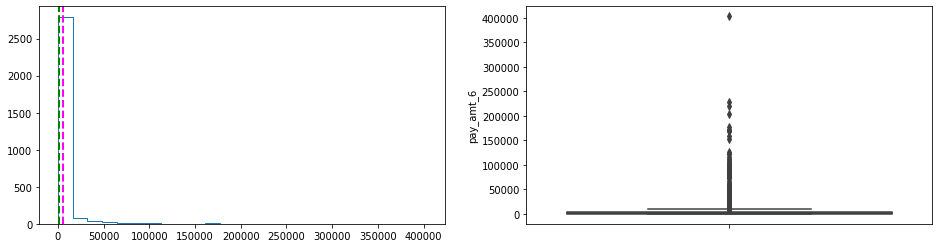

In [10]:
# menggunakan for loop untuk menjalankan fungsi persebaran
for i in numerik:
    persebaran(df,i)
    print('='*100)

Terlihat bahwa seluruh data bersifat positive skewed dan memiliki outlier. Bahkan kolom2 bill_amt dan pay_amt memilkiki nilai skewness yang sangat tinggi.


#### Melihat keseimbangan data kolom kategori

jumlah kategori pada kolom  sex adalah=  2
Jumlah masing2 value = 
 2    1802
1    1163
Name: sex, dtype: int64


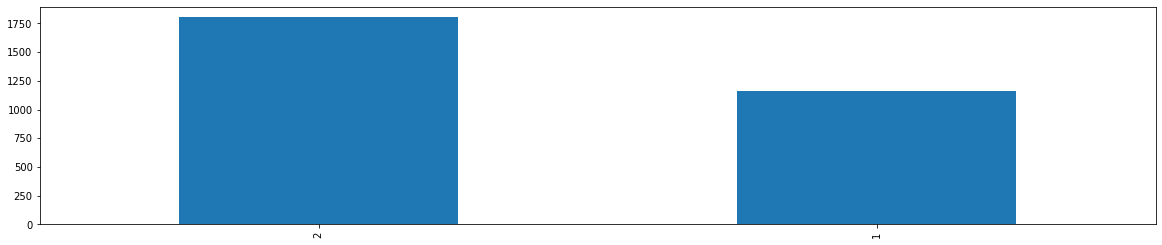

jumlah kategori pada kolom  education_level adalah=  7
Jumlah masing2 value = 
 2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64


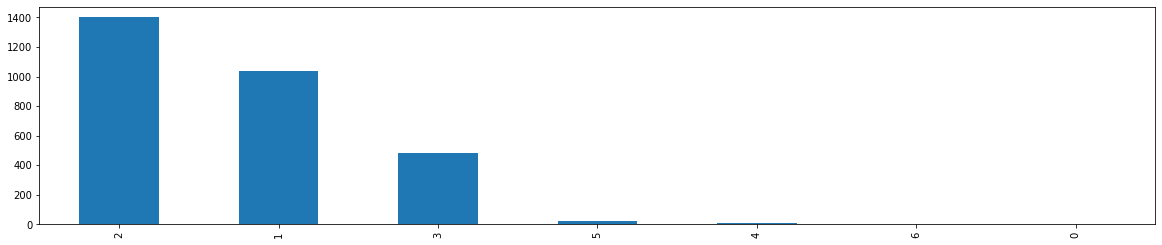

jumlah kategori pada kolom  marital_status adalah=  4
Jumlah masing2 value = 
 2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64


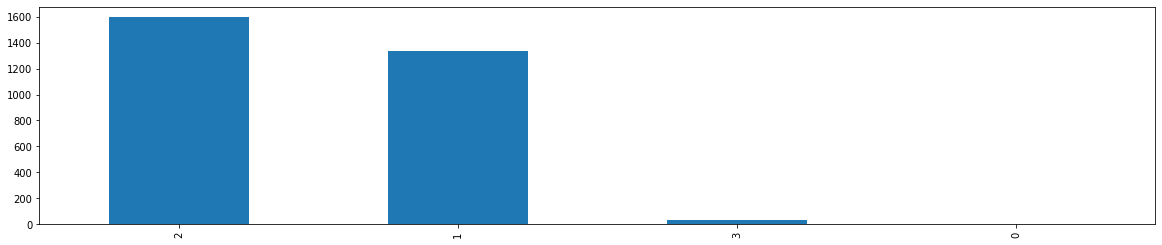

jumlah kategori pada kolom  pay_1 adalah=  11
Jumlah masing2 value = 
  0    1516
-1     540
 1     356
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64


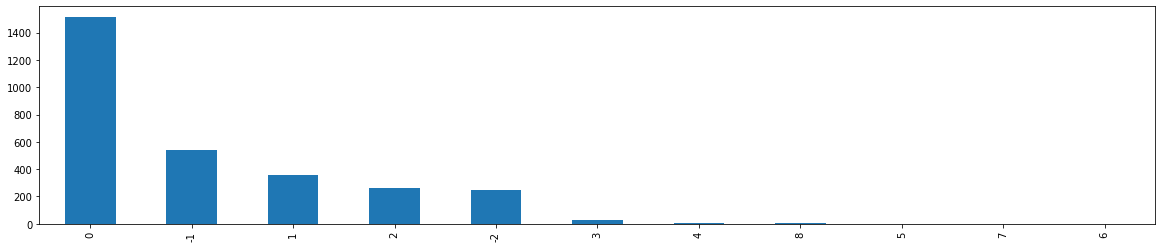

jumlah kategori pada kolom  pay_2 adalah=  10
Jumlah masing2 value = 
  0    1607
-1     580
 2     374
-2     353
 3      32
 4       8
 1       4
 7       3
 5       2
 6       2
Name: pay_2, dtype: int64


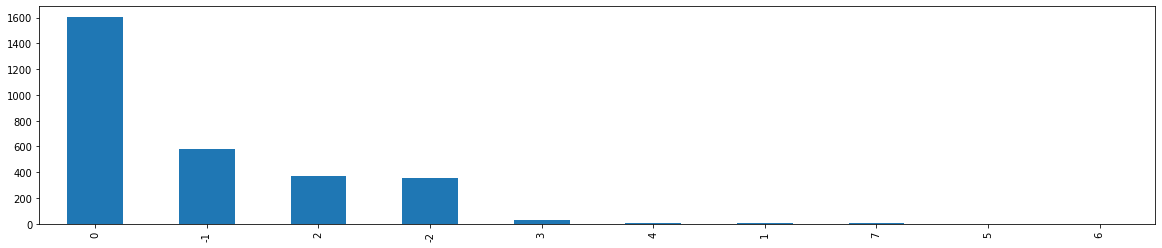

jumlah kategori pada kolom  pay_3 adalah=  9
Jumlah masing2 value = 
  0    1610
-1     580
 2     368
-2     367
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64


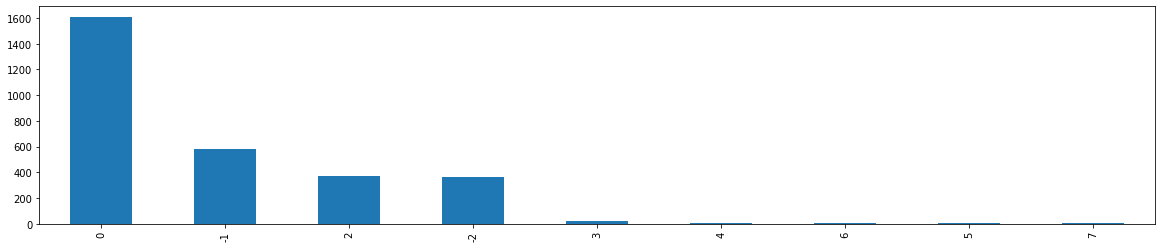

jumlah kategori pada kolom  pay_4 adalah=  10
Jumlah masing2 value = 
  0    1667
-1     532
-2     408
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64


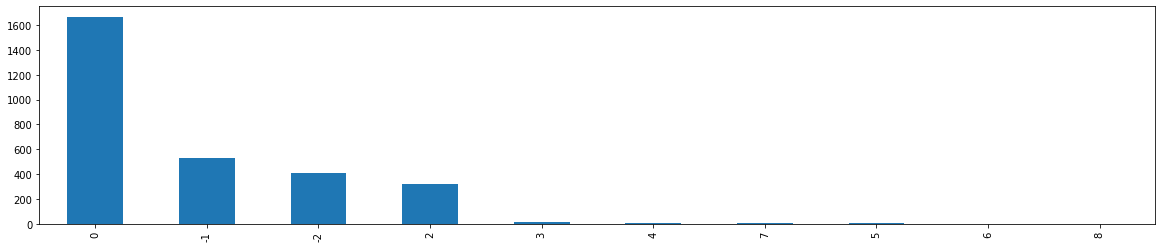

jumlah kategori pada kolom  pay_5 adalah=  9
Jumlah masing2 value = 
  0    1702
-1     504
-2     441
 2     280
 3      19
 4       9
 7       7
 5       2
 6       1
Name: pay_5, dtype: int64


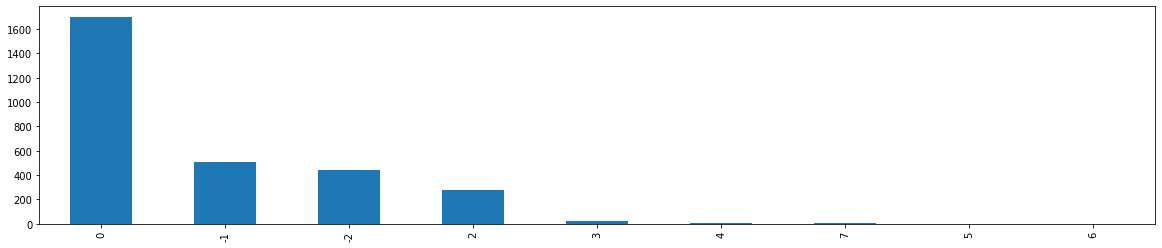

jumlah kategori pada kolom  pay_6 adalah=  8
Jumlah masing2 value = 
  0    1626
-1     540
-2     470
 2     297
 3      21
 7       6
 6       3
 4       2
Name: pay_6, dtype: int64


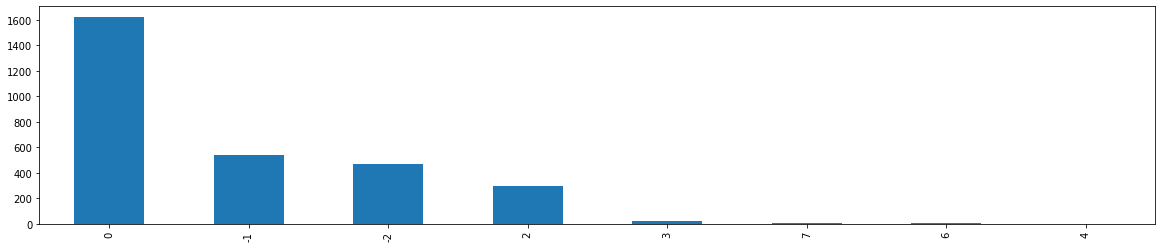

jumlah kategori pada kolom  def_pay adalah=  2
Jumlah masing2 value = 
 0    2330
1     635
Name: def_pay, dtype: int64


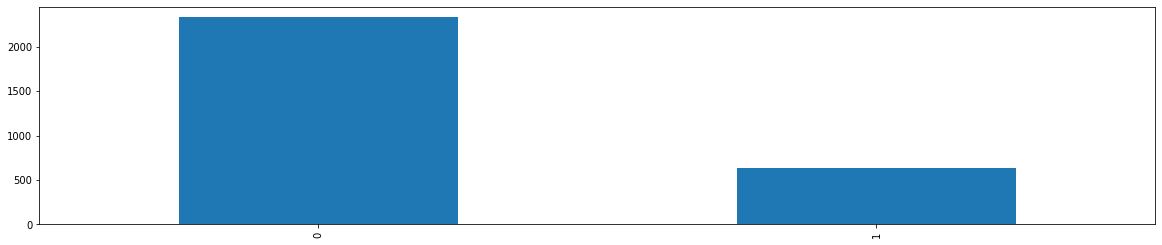

In [11]:
# menggunakan for loop untuk menjalankan fungsi keseimbangan

for i in kategori:
    keseimbangan(df,i)
    print('='*100)

Terlihat bahwa semua data kategorik cenderung imbalance. Hal ini bisa mempengaruhi hasil evaluasi model. 

# 5. Data Preprocessing

### Membuat data inference

In [12]:
df_inf = df.sample(n= 200, random_state=3)
df_inf.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
1696,100000,1,2,2,31,1,2,0,0,0,...,80051,76446,76815,0,3631,3000,3000,2800,2697,0
1752,10000,2,2,2,27,1,2,2,0,0,...,9808,8650,0,1230,0,500,450,0,0,1
2369,180000,2,2,1,29,1,4,3,2,2,...,3455,0,0,0,0,0,0,0,0,0
2269,300000,1,1,2,32,-2,-2,-2,-2,-2,...,264,414,264,264,264,264,414,264,264,0
87,230000,2,2,2,38,0,0,0,0,0,...,111039,113365,115625,3867,3941,4123,4267,4300,4084,0


In [13]:
# menghilangkan data inference dari dataset utama
df_train_test = df.drop(df_inf.index)

# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

df_train_test.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
0,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
1,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
2,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
3,20000,1,1,2,29,0,0,2,0,0,...,17368,17959,19023,3170,0,1000,1000,3000,0,0
4,50000,1,1,1,42,0,0,0,0,0,...,29664,29057,29083,1850,1507,1100,1200,1116,2900,0


### Kategorisasi Ulang 

Berdasarkan EDA telah diketahui bahwa kolom2 kategori bersifat imbalance. Untuk sedikit mengatasi hal tersebut maka akan dilakukan penggabungan beberapa value/category dalam kolom:

- Pada masing2 kolom `pay_` terlihat bahwa kategori keterlambatan pembayaran 3 bulan ke atas memiliki jumlah yang jauh lebih kecil dari pada sebelum 3 bulan. sehingga kategori2 keterlambatan pembayaran 3 bulan ke atas (yakni 3,4,5,6,7,8,9) akan dijadikan 1 ke dalam kategori 3 sehingga kategori 3 akan berubah makna menjadi `keterlambatan pembayaran 3 bulan ke atas`.
- Pada masing2 kolom `pay_` terlihat bahwa kategori 1 (terlambat 1 bulan) hanya muncul pada kolom `pay_1` dan `pay_2`. Kemudian kita temukan bahwa jumlah anggota kategori 1 pada `pay_2` sangat sedikit. Sehingga berdasarkan pertimbangan pribadi maka kategori 1 dan 2 akan digabung menjadi kategori 2 dengan makna baru menjadi `keterlambatan pembayaran 1-2 bulan`  
- kolom `education_level` memiliki beberapa kategori yang bermakna others yakni kategori 0,4,5, dan 6. masing2 kategori tersebut akan digabungkan menjadi kategori 0 dengan makna others

In [14]:
# Membuat fungsi untuk menggabungkan beberapa value pada kolom kategori

# data: dataframe, 
# cat_list: list dari kategori yg ingin digabung,
# columns: pada kolom mana saja akan diberlakukan, 
# new_cat: nilai categori yg baru

def kategori_ulang(data, cat_list, columns, new_cat): 
    for i in columns:
        for j in cat_list:
            data.loc[data[i] == j, i] = new_cat

In [15]:
# menggabungkan kategori 3,4,5,6,7,8,9 pada kolom pay_
list_cat_1 =[3,4,5,6,7,8,9]
kolom_pay = ['pay_1','pay_2','pay_3','pay_4','pay_5', 'pay_6']

kategori_ulang(df_train_test,list_cat_1,kolom_pay,3)

# menggabungkan kategori 1&2 pada kolom pay_
list_cat_2=[1,2]
kategori_ulang(df_train_test,list_cat_2,kolom_pay,2)

# Menggabungkan kategori 0,4,5,6 pada kolom education_level
list_cat_3 = [0,4,5,6]
kolom_edu= ['education_level']
kategori_ulang(df_train_test,list_cat_3,kolom_edu,0)

In [16]:
# melihat hasil penggabungan kategori pada kolom pay_1

df_train_test.pay_1.value_counts()

 0    1416
 2     568
-1     505
-2     233
 3      43
Name: pay_1, dtype: int64

In [17]:
# melihat hasil penggabungan kategori pada kolom education_level

df_train_test.education_level.value_counts()

2    1313
1     963
3     448
0      41
Name: education_level, dtype: int64

### Splitting Feature & Target

kolom `'def_pay'` menajdi target

In [18]:
# Membuat target dan feature
X = df_train_test.drop('def_pay', axis=1)
y = df_train_test['def_pay']


# membuat X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 3,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2212, 23)
Test Size  :  (553, 23)


### Handling Outliers

Disini akan dilakukan handling outlier dengan metode Censoring. Metode ini dipilih karena berdasarkan Bab EDA dan personal judgment data outlier tersebut memuat informasi yang penting sehingga jika dilakukan trimming dikhawatirkan akan membuang terlalu banyak data yang penting.

**`Note`**: Censoring dilakukan pada Train set dan Test set. Capping value yg digunakan berasal dari Train set kemudian diterapkan untuk Test set.

In [19]:
# Melakukan Censoring pada X_train dan X_test dengan Winsorizer

winsorizer = Winsorizer(
    capping_method='iqr', # menggunakan batasan IQR
    tail= 'both',
    fold= 1.5, # konstanta pengali IQR
    variables= numerik # Kolom2 yang akan disensor adalah kolom numerikal
)

winsorizer.fit(X_train) #menggunakan X_train sebagai patokan untuk capping values

# menerapkan/transform caping value ke X_train dan X_test
X_train_t = winsorizer.transform(X_train)
X_test_t = winsorizer.transform(X_test)

 skewness: 0.8825434401085063
 kurtosis: 0.06400842558913356
 Mean: 163838.15551537072
 Median: 140000.0
 Min: 10000.0
 Max: 525000.0
persebaran data kolom  limit_balance


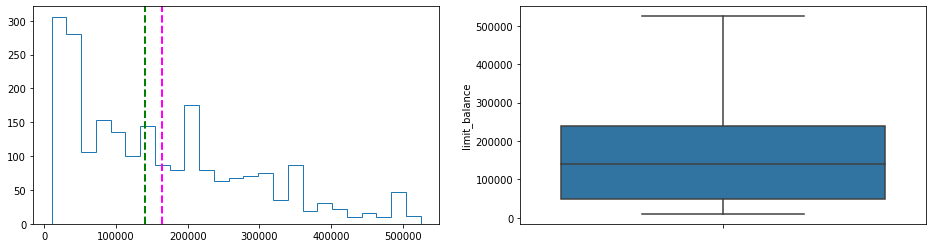

 skewness: 0.7184792394098186
 kurtosis: -0.16818269232898064
 Mean: 35.138336347197104
 Median: 34.0
 Min: 21.0
 Max: 60.5
persebaran data kolom  age


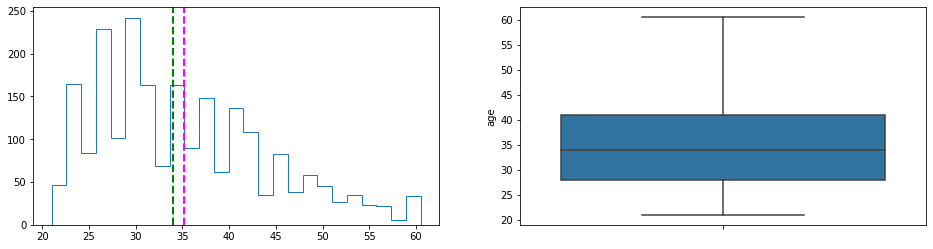

 skewness: 1.1845912714039397
 kurtosis: 0.15138835890961078
 Mean: 46345.809674502714
 Median: 23482.0
 Min: -11545.0
 Max: 169569.0
persebaran data kolom  bill_amt_1


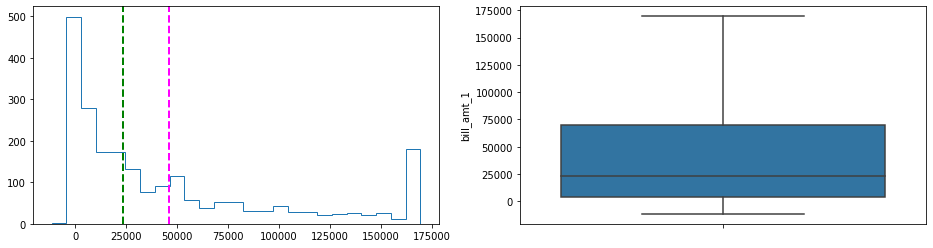

 skewness: 1.198339838198907
 kurtosis: 0.2390900689433746
 Mean: 44947.02034358047
 Median: 22623.0
 Min: -67526.0
 Max: 167324.0
persebaran data kolom  bill_amt_2


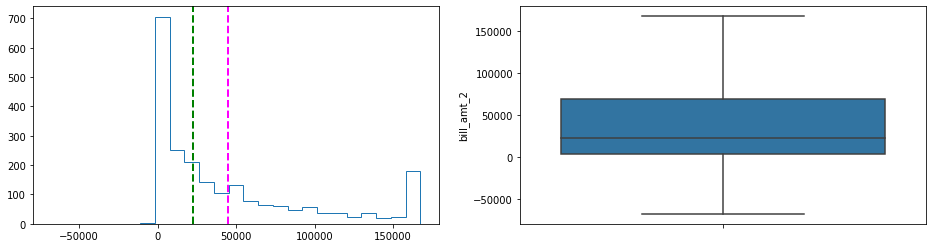

 skewness: 1.1852275328181516
 kurtosis: 0.16862766352768999
 Mean: 42664.424389692584
 Median: 21000.0
 Min: -25443.0
 Max: 157928.625
persebaran data kolom  bill_amt_3


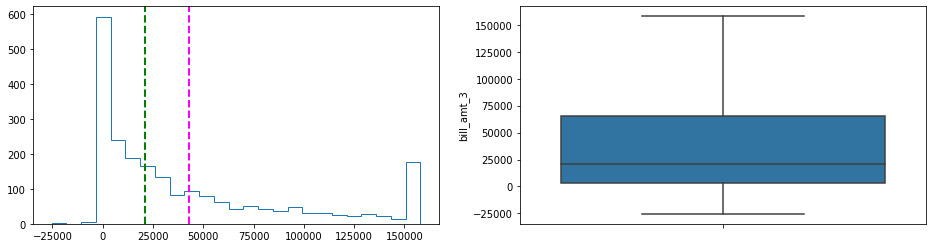

 skewness: 1.1761134529063044
 kurtosis: 0.13739673898095672
 Mean: 38933.71660262206
 Median: 19861.0
 Min: -46627.0
 Max: 143788.125
persebaran data kolom  bill_amt_4


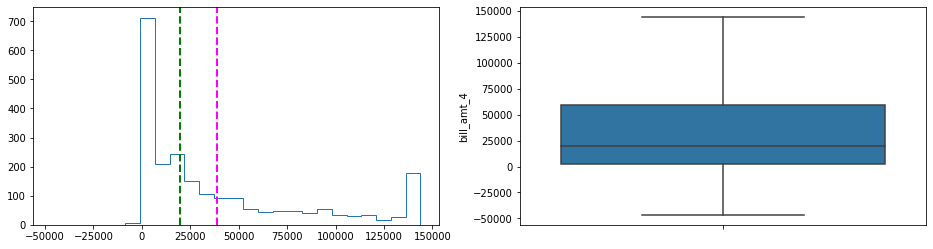

 skewness: 1.1776793348669363
 kurtosis: 0.10078259635347431
 Mean: 36198.357368896926
 Median: 18812.5
 Min: -46627.0
 Max: 133749.5
persebaran data kolom  bill_amt_5


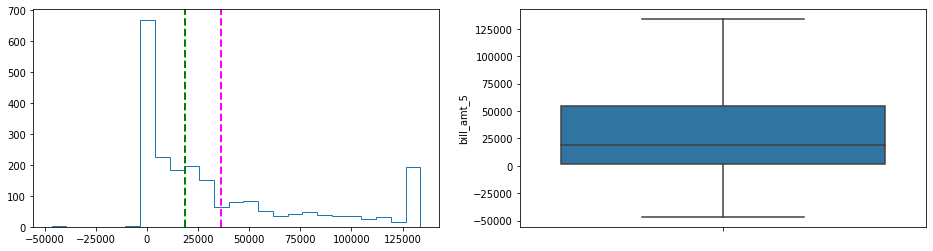

 skewness: 1.1899660006338706
 kurtosis: 0.12551982803144757
 Mean: 35433.27825497287
 Median: 18632.0
 Min: -46627.0
 Max: 131791.125
persebaran data kolom  bill_amt_6


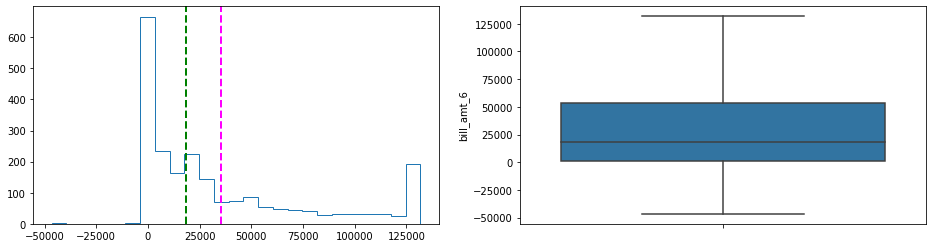

 skewness: 1.0061750000544238
 kurtosis: -0.17541954026576523
 Mean: 3566.6456826401445
 Median: 2200.0
 Min: 0.0
 Max: 11064.75
persebaran data kolom  pay_amt_1


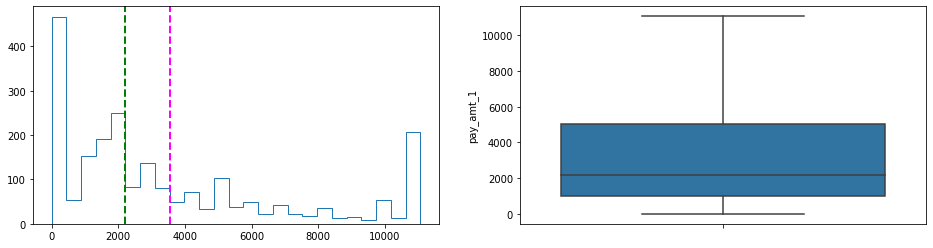

 skewness: 1.048120248729523
 kurtosis: -0.10664605148859829
 Mean: 3551.7875226039782
 Median: 2159.0
 Min: 0.0
 Max: 11324.0
persebaran data kolom  pay_amt_2


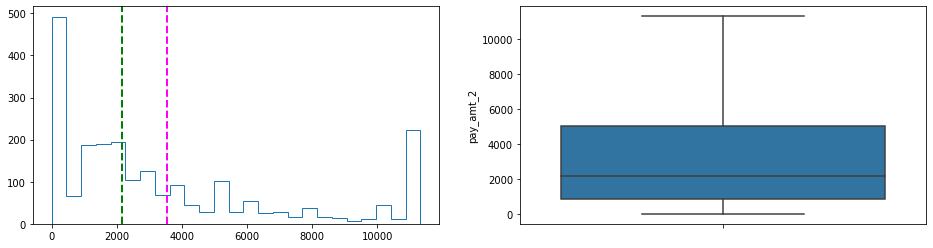

 skewness: 1.2340020509057716
 kurtosis: 0.3722296206934117
 Mean: 3115.50904159132
 Median: 2000.0
 Min: 0.0
 Max: 10979.75
persebaran data kolom  pay_amt_3


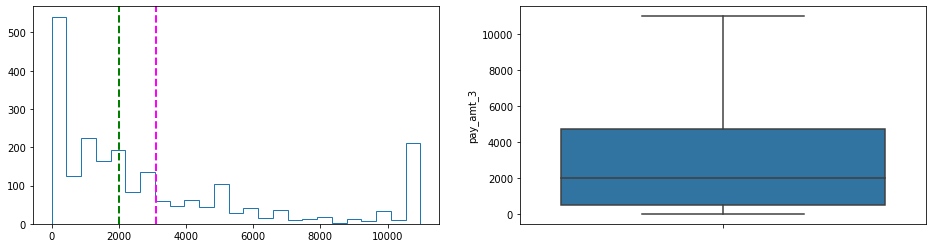

 skewness: 1.1984768658821752
 kurtosis: 0.3113204488590844
 Mean: 2672.8336347197105
 Median: 1580.0
 Min: 0.0
 Max: 9550.0
persebaran data kolom  pay_amt_4


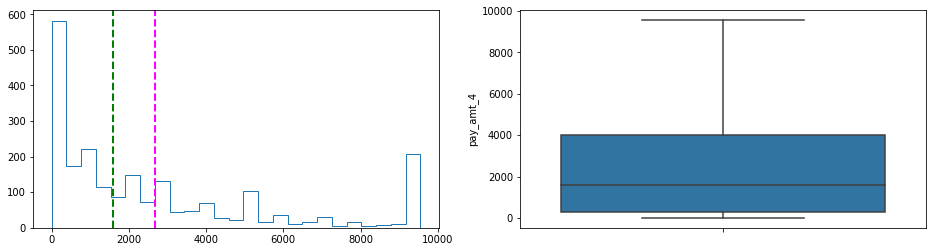

 skewness: 1.1835112892034476
 kurtosis: 0.29648551843622517
 Mean: 2689.3399638336346
 Median: 1620.0
 Min: 0.0
 Max: 9511.0
persebaran data kolom  pay_amt_5


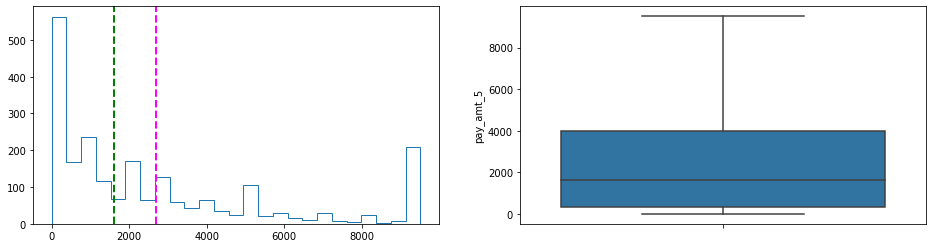

 skewness: 1.187362108996426
 kurtosis: 0.24904697941155574
 Mean: 2758.4516274864377
 Median: 1646.5
 Min: 0.0
 Max: 9839.625
persebaran data kolom  pay_amt_6


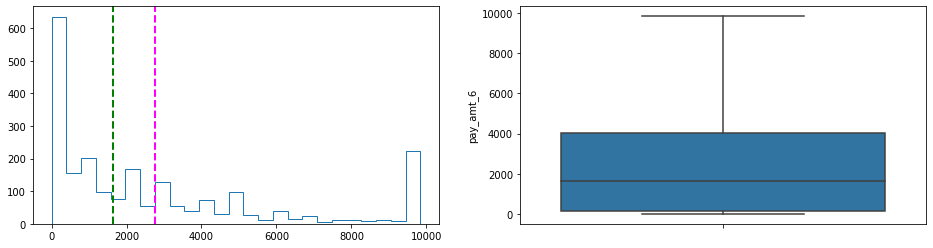

In [20]:
# Melihat persebaran data yang baru

for i in numerik:
    persebaran(X_train_t,i)
    print('='*100)

Walaupun masih bersifat positive skewed setelah dilakukan censoring, namun data sudah tidak memiki outlier

### Feature Selection

In [21]:
# Menampilkan kolom X_train_t

X_train_t.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

Untuk dapat menentukan kolom mana saja yang akan dipilih menjadi feature kita akan lihat coeficient correlation dari masing2 kolom terhadap target

In [22]:
# membuat dataframe gabungan X_train_t, y_train untuk membuat heatmap coeficient correlation
df_for_corr= pd.concat([X_train_t, y_train], axis=1)

# menampilkan table koefisien korelasi
df_for_corr.corr()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
limit_balance,1.000000,0.045619,-0.232155,-0.101741,0.118269,-0.198578,-0.280684,-0.273697,-0.238262,-0.226620,...,0.262194,0.262885,0.260388,0.360534,0.334879,0.379156,0.348401,0.368373,0.388900,-0.154033
sex,0.045619,1.000000,0.020425,-0.017734,-0.140155,-0.082055,-0.102747,-0.098941,-0.075472,-0.059933,...,-0.033827,-0.037737,-0.034148,-0.022522,-0.005938,0.008648,0.001756,0.004470,0.011284,-0.023237
education_level,-0.232155,0.020425,1.000000,-0.117991,0.221040,0.079551,0.123073,0.123646,0.111646,0.117969,...,-0.011022,-0.016470,-0.008411,-0.068386,-0.080115,-0.089172,-0.065042,-0.078860,-0.083084,0.081345
marital_status,-0.101741,-0.017734,-0.117991,1.000000,-0.410841,-0.010463,0.046889,0.048565,0.043697,0.043262,...,-0.008017,-0.003352,0.006256,-0.014442,-0.007777,-0.016600,0.000755,0.001674,0.006251,-0.031911
age,0.118269,-0.140155,0.221040,-0.410841,1.000000,-0.003714,-0.049029,-0.040732,-0.058719,-0.072755,...,0.043603,0.051291,0.044429,0.049534,0.015929,0.001614,0.044735,0.031363,0.004951,0.026028
pay_1,-0.198578,-0.082055,0.079551,-0.010463,-0.003714,1.000000,0.594220,0.469347,0.426753,0.427195,...,0.142142,0.133360,0.135707,-0.153188,-0.146680,-0.115705,-0.089056,-0.095150,-0.116457,0.343097
pay_2,-0.280684,-0.102747,0.123073,0.046889,-0.049029,0.594220,1.000000,0.752860,0.627836,0.595314,...,0.267987,0.255495,0.255641,-0.066112,-0.040698,-0.014469,-0.018314,-0.006289,-0.033307,0.310594
pay_3,-0.273697,-0.098941,0.123646,0.048565,-0.040732,0.469347,0.752860,1.000000,0.729758,0.651198,...,0.284571,0.276411,0.265039,0.092459,-0.077584,-0.011764,0.014018,-0.001023,-0.018123,0.274654
pay_4,-0.238262,-0.075472,0.111646,0.043697,-0.058719,0.426753,0.627836,0.729758,1.000000,0.794043,...,0.317535,0.317435,0.311908,0.060632,0.104223,-0.051832,0.039268,0.022159,0.006620,0.259360
pay_5,-0.226620,-0.059933,0.117969,0.043262,-0.072755,0.427195,0.595314,0.651198,0.794043,1.000000,...,0.349435,0.343915,0.327268,0.040634,0.077037,0.104498,-0.000802,0.024970,0.029323,0.261116


<AxesSubplot:>

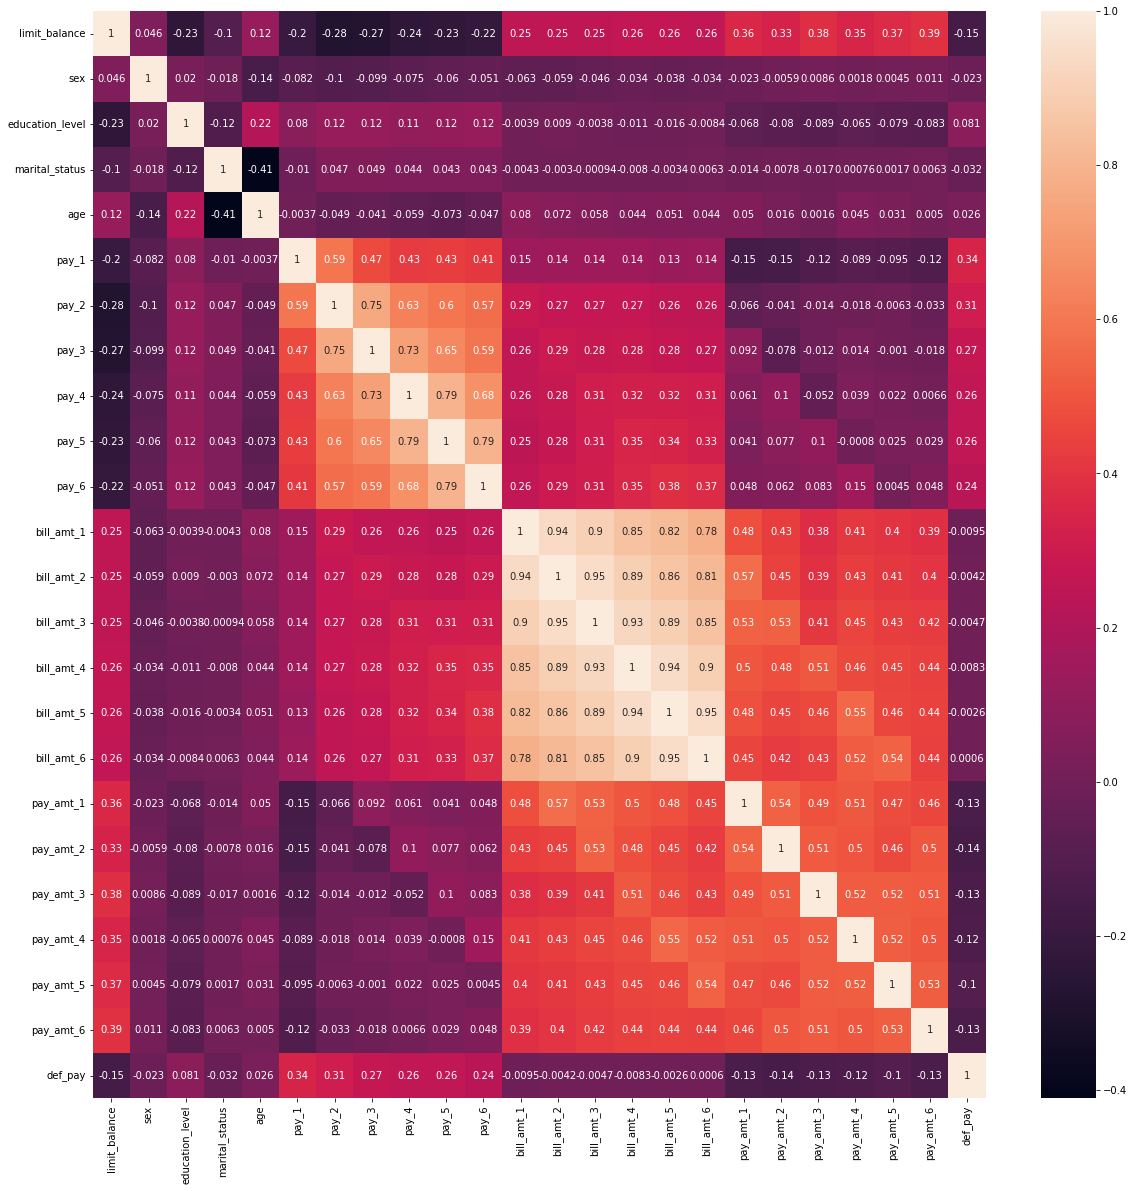

In [23]:
# membuat heatmap koefisien korelasi

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df_for_corr.corr(), annot= True)

**`Penjelasan`**

Terlihat bahwa semua kolom feature memiliki koefisien korelasi yang rendah (dibawah 0.4) terhadap terget(`def_pay`). Namun kita bisa lihat bahwa kolom2 `pay_` memiliki korelasi yang relatif lebih tinggi (0.34-0.24) ke target dibandingkan kolom2 lainnya (<0.2). Di sisi lain kolom2 `bill_amt_` memiliki korelasi yang rendah dengan target dan memiliki korelasi yang tinggi dengan `kolom pay_` (sekitar 0.3) dan juga dengan kolom `pay_amt_` (sekitar 0.5). korelasi yang tinggi diantara feature akan membawa informasi yang mirip ke dalam model sedangkan seringkali tidak pengaruh yg signifikan dan membuat performa model menjadi lebih baik namun justru hanya memberatkan komputasi. Dengan demikian maka diputuskan untuk `tidak menggunakan kolom2 'bill_amt_' sebagai feature`.

In [24]:
# melihat keseimbangan kolom marital_status
X_train_t.marital_status.value_counts()

2    1188
1     994
3      28
0       2
Name: marital_status, dtype: int64

**`Penjelasan`**

Berdasarkan info dari cell di atas terlihat bahwa kolom marital_status memiliki data yang sangat imbalance dimana kolom kategori 3(devorce) hanya memiliki 27 data dan kategori 0 (other) memiliki 4 data sedangkan kategori 1 dan 2 memiliki masing2 1027 dan 1225 data. `sehingga diputuskan untuk tidak menggunakan kolom marital_status`

In [25]:
X_train_t = X_train_t[['limit_balance', 'sex', 'education_level', 'age','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']]
       
X_train_t.head()

,limit_balance,sex,education_level,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2227,140000.0,2,2,36.0,-1,-1,-1,-1,0,-1,341.00,165.0,1031.0,0.0,863.0,487.000
2395,180000.0,2,1,43.0,-1,-1,-1,0,-1,-1,11064.75,11324.0,162.0,9550.0,506.0,1304.000
765,150000.0,2,1,25.0,0,0,0,0,0,2,2000.00,1417.0,1256.0,4429.0,1000.0,0.000
1960,200000.0,2,2,31.0,2,-2,-1,-1,-2,-2,0.00,500.0,0.0,0.0,0.0,0.000
706,290000.0,2,1,50.0,0,0,0,0,0,0,7000.00,10009.0,5000.0,5000.0,5000.0,9839.625


### Kolom Numerik dan Kategorik

Berikut adalah kolom numerik dan kategorik berdasarkan data X_train_t:
- numerik   = 'limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6'
- kategorik = 'sex', 'education_level','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'



In [26]:
#membuat list kategori dan numerik
df_num = ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
df_cat = ['sex', 'education_level','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [27]:
# Membagi train dan test berdasarkan type data dan jenis kolom

# Train Set
X_train_num = X_train_t[df_num]
X_train_cat = X_train_t[df_cat]


# Test Set
X_test_num = X_test_t[df_num]
X_test_cat = X_test_t[df_cat]

X_test_cat

,sex,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
500,2,1,0,0,0,0,0,0
760,1,3,0,0,0,0,0,0
934,1,2,0,0,0,0,0,-1
2249,2,2,0,-1,0,0,0,0
805,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
74,2,1,0,0,0,0,0,0
780,2,2,0,0,0,0,0,0
892,2,1,0,0,0,0,0,0
1090,2,2,0,0,0,0,0,0


### Feature Scaling

In [28]:
# Scaling kolom numerical dengan MinmaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.25242718, 0.37974684, 0.03081859, ..., 0.        , 0.09073704,
        0.04949376],
       [0.33009709, 0.55696203, 1.        , ..., 1.        , 0.05320156,
        0.13252538],
       [0.27184466, 0.10126582, 0.1807542 , ..., 0.46376963, 0.10514142,
        0.        ],
       ...,
       [0.52427184, 0.65822785, 0.02268465, ..., 0.57664921, 0.56229629,
        0.04400574],
       [0.33009709, 0.30379747, 0.16674575, ..., 0.02596859, 0.03522237,
        0.02032598],
       [0.17475728, 0.32911392, 0.12399738, ..., 0.10471204, 0.10514142,
        0.05955512]])

### Feature Encoding

meskipun kolom `education_level` sebenarnya bersifat ordinal, namun terdapat kategori other (0) yang tidak diketahui urutannya terhadap kategori yang lain sehingga disini value pada kolom `education_level` akan dianggap sebagai non-ordinal categories.

Metode encoding yang digunakan untuk kategori non-ordinal adalah OneHotEncoder()

In [29]:
encoder = OneHotEncoder(handle_unknown='ignore')


X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.fit_transform(X_test_cat).toarray()

X_train_cat_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

### Menggabungkan kembali kolom numerik dan kolom kategorik

In [30]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.25242718, 0.37974684, 0.03081859, ..., 0.        , 0.        ,
        0.        ],
       [0.33009709, 0.55696203, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27184466, 0.10126582, 0.1807542 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.52427184, 0.65822785, 0.02268465, ..., 0.        , 0.        ,
        0.        ],
       [0.33009709, 0.30379747, 0.16674575, ..., 0.        , 0.        ,
        0.        ],
       [0.17475728, 0.32911392, 0.12399738, ..., 1.        , 0.        ,
        0.        ]])

# 6. Model Definition

Pada tahap ini akan dicoba beberapa model algoritma yakni Logistic Regression, SVM, Decision tree, Random Forest, KNN, naive bayes, dan XGboost. Masing-masing algoritma akan dipilih yang terbaik berdasarkan cross_val_score. Selanjutnya dilakukan Hyperparamater tuning pada algoritma yang telah dipilih. 

#### Membuat base line masing2 algoritma

In [31]:
# Logistic Regression
log_reg = LogisticRegression()

# SVM
svm = SVC()

# Decision tree
tree = DecisionTreeClassifier()

# Random Forest
rf = RandomForestClassifier()

# KNN
knn = KNeighborsClassifier()

# Naive Bayes
nb = GaussianNB()

# XGboost
xgb = XGBClassifier()

Selanjutnya akan dilakukan pembandingan nilai std dan mean dari cross validation dari masing2 algoritma untuk menemukan algoritma terbaik. 

`Metrik yang digunakan untuk perbandingan adalah recall` karena kita berusaha untuk mendapatkan Model yang memiliki jumlah False Negative terendah. Atau dengan kata lain ingin mendapatkan model yang sebisa mungkin `tidak akan mengeluarkan prediksi bahwa kredit seseorang bulan depan tidak akan default padahal sesunguhnya mengalami default.` 

In [32]:
%%time
# Membuat dataframe yg berisi mean dan std cross validation score dengan scoring f1_score

# Membuat list yg berisi model yang akan digunakan
models= [log_reg, svm, tree, rf, knn, nb, xgb]

# membuat variable cv yang akan dimasukkan menggunakan RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

# membuat list kosong untuk cross validation score mean dan std
cvs_mean = [] 
cvs_std = []

# menggunakan for loop untuk menghitung cross_val_score mengisi list kosong
for i in models:
    cvs_mean.append(cross_val_score(i, X_train_final, y_train, cv=cv, scoring='recall',n_jobs=-1).mean())
    cvs_std.append(cross_val_score(i, X_train_final, y_train, cv=cv, scoring='recall',n_jobs=-1).std())

# Membuat dataframe
csv_models= pd.DataFrame({
    'cvs_std':cvs_std,
    'cvs_mean':cvs_mean},
    index=['log_reg', 'svm', 'tree', 'rf', 'knn', 'nb', 'xgb']
    )

csv_models

CPU times: total: 1.88 s
Wall time: 17.7 s


,cvs_std,cvs_mean
log_reg,0.057124,0.370328
svm,0.068747,0.379344
tree,0.069894,0.445612
rf,0.068285,0.365913
knn,0.065376,0.364512
nb,0.060812,0.437048
xgb,0.065600,0.371356


In [33]:
# mengurutkan dataframe csv_models berdasarkan standar deviasi dan rata2 cross_val_score

print('Rank berdasarkan standar deviasi')
print(csv_models.sort_values('cvs_std'))
print('='*100)
print('Rank berdasarkan mean')
print(csv_models.sort_values('cvs_mean', ascending=False))

Rank berdasarkan standar deviasi
          cvs_std  cvs_mean
log_reg  0.057124  0.370328
nb       0.060812  0.437048
knn      0.065376  0.364512
xgb      0.065600  0.371356
rf       0.068285  0.365913
svm      0.068747  0.379344
tree     0.069894  0.445612
Rank berdasarkan mean
          cvs_std  cvs_mean
tree     0.069894  0.445612
nb       0.060812  0.437048
svm      0.068747  0.379344
xgb      0.065600  0.371356
log_reg  0.057124  0.370328
rf       0.068285  0.365913
knn      0.065376  0.364512


Terlihat bahwa jika mengacu pada standar deviasi maka semua algoritma memilki nilai std cross_val_score yang rendah dan tidak terlalu berbeda jauh (hanya berbeda sekitar 0.01).

Berdasarkan urutan mean cross_val_score, algoritma Naive Bayes memiliki nilai mean tertinggi. Dengan demikian maka algoritma `Naive bayes akan dipilih untuk dilakukan Hyperparameter Tuning`.  

In [34]:
%%time

# membuat variable cv yang akan dimasukkan menggunakan RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=5, random_state=999)

# Mendifinisikan rentang parameter untuk Naive Bayes
param_grid = {'var_smoothing': np.logspace(0,-100, num=100)}

# menggunakan   
grid_nb = GridSearchCV(estimator=nb, 
                    param_grid= param_grid, 
                    cv=cv_method,
                    scoring='recall',
                    n_jobs=-1)

grid_nb.fit(X_train_final, y_train)
grid_nb.best_params_

CPU times: total: 2.03 s
Wall time: 2.19 s


{'var_smoothing': 0.09770099572992251}

Untuk Naive Bayes paramter terbaiknya adalah {'var_smoothing': 0.09770099572992251}

# 7. Model Training



Training Model dengan hyperparameter terbaik yang telah ditentukan berdasarkan GridSearchCV

In [35]:
# Decision Tree
best_nb = grid_nb.best_estimator_

# 8. Model Evaluation

## Melakukan Prediksi

In [36]:
# Melakukan prediksi dengan Naive Bayes
y_pred_train_nb = best_nb.predict(X_train_final)
y_pred_test_nb = best_nb.predict(X_test_final)

y_pred_train_nb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluasi Model dengan classification_report

In [37]:
# Evaluasi pada Train set
print('Train Set')
print(classification_report(y_train, y_pred_train_nb))
print('='*100)

# Evaluasi pada test set
print('Test Set')
print(classification_report(y_test, y_pred_test_nb))

Train Set
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1738
           1       0.55      0.46      0.50       474

    accuracy                           0.80      2212
   macro avg       0.70      0.68      0.69      2212
weighted avg       0.79      0.80      0.80      2212

Test Set
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       435
           1       0.57      0.50      0.53       118

    accuracy                           0.81       553
   macro avg       0.72      0.70      0.71       553
weighted avg       0.81      0.81      0.81       553



Berdasarkan 2 tabel di atas terlihat bahwa train set dan test set memiliki niali precision, recall dan f1 yang tidak terlalu berbeda sehingg dapat disimpulkan bahwa model `tidak overfitting`. 

Selanjutnya meskipun terjadi kenaikan f1_score, nanum nilai recall turun 0.01 poin padahal disini kita berusaha mendapatkan nilai recall yang tinggi untuk model. 

Untuk lebih jelasnya kita akan melihat Confusion Matrix

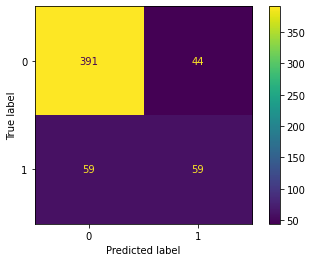

In [38]:
# membuat confusion matrix 
cm = confusion_matrix(y_test, y_pred_test_nb, labels=best_nb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_nb.classes_)
disp.plot()

Terlihat bahwa model masih menghasilkan jumlah True False yang tinggi. Hal ini tidak bagus karena model akan dapat memprediksi kredit seseorang tidak akan default padahal kreditnya akan default dan ini akan merugikan.  



## Membandingkan Hasil Tuning Hyperparameter dengan Model Baseline

In [39]:
# baseline model Naive Bayes
nb.fit(X_train_final,y_train)
base_nb = nb.predict(X_test_final)

# Print model baseline
print('Model baseline')
print(classification_report(y_test, base_nb))
print('='*100)


# Print model setelah hyperparameter
print('Model Setelah Hyperparameter')
print(classification_report(y_test, y_pred_test_nb))

Model baseline
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       435
           1       0.60      0.48      0.54       118

    accuracy                           0.82       553
   macro avg       0.73      0.70      0.71       553
weighted avg       0.81      0.82      0.81       553

Model Setelah Hyperparameter
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       435
           1       0.57      0.50      0.53       118

    accuracy                           0.81       553
   macro avg       0.72      0.70      0.71       553
weighted avg       0.81      0.81      0.81       553



Terlihat bahwa Hyperparameter Tuning pada naive bayes telah berhasil meningkatkan nilai f1_score dan yang terpenting nilai recall menjadi 0.46. Namun demikian, nilai tersebut masih cukup rendah.


Setelah melihat hasil model yang masih tidak memuaskan, selanjutnya akan dilakukan Hyperparameter tuning terhadap beberapa algoritma lain. Dari hyperparameter tersebut akan diambil model sekaligu hyperparamter terbaiknya untuk dibandingkan performanya dengan performa model naive bayes

## Hyperparameter tuning untuk model-model lain

Model2 yang akan dilakukan hyperparamter adalah Random Forest, KNN, Logistic Regression. Ketiga model tersebut dipilih karena masing2 memiliki metode dan dasar logika yang berbeda dalam melakukan prediksi. Logistik regresion dengan konsep pemisahan dengan garis regresi linear nya,  KNN dengan mengihitung jarak dengan beberapa poin data, dan Random Forest dengan konsep nya yang mirip dengan Decision tree. Perbedaan tersebut diharapkan dapat menjadi representasi masing2 logika untuk diambil yang terbaik

In [40]:

# membuat a pipeline
pipe = Pipeline([('classifier', rf)])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [ # Random Forest
                {'classifier': [rf],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [2, 3],
                 "classifier__criterion": ["gini", "entropy"],
                 "classifier__max_depth": [3,4],
                 'classifier__min_samples_split': [2,3,4],
                 "classifier__min_samples_leaf": [1, 2, 3]
                 },

                # KNN
                {'classifier': [knn],
                 'classifier__n_neighbors' : [5,7,9,11,13,15],
                 'classifier__weights' : ['uniform','distance'],
                 'classifier__metric' : ['minkowski','euclidean','manhattan']
                 },
                 
                 # Logistic Regression
                  {'classifier': [log_reg],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)}]
                  
# membuat grid search
clf = GridSearchCV(pipe, search_space, cv=cv, scoring='recall', n_jobs=-1,)

In [41]:
%%time
# Fit grid search
best_model = clf.fit(X_train_final, y_train)

In [ ]:
# Menampilkan best model dan hyperparameternya

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('classifier', LogisticRegression(C=7.742636826811269))],
 'verbose': False,
 'classifier': LogisticRegression(C=7.742636826811269),
 'classifier__C': 7.742636826811269,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

Model yang terbaik dari ketiga model yang di Tuning adalah model Logistic Regression dengan Hyperparamter seperti yang ditampilkan di atas.

In [ ]:
# Melakukan prediksi Best Model
y_pred_train_best_model = best_model.predict(X_train_final)
y_pred_test_best_model = best_model.predict(X_test_final)

In [ ]:
# Evaluasi pada Train set
print('Train Set Best Model')
print(classification_report(y_train, y_pred_train_best_model))
print('='*100)

# Evaluasi pada test set
print('Test Set Best Model')
print(classification_report(y_test, y_pred_test_best_model))

Train Set Best Model
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1805
           1       0.71      0.39      0.50       487

    accuracy                           0.84      2292
   macro avg       0.78      0.67      0.70      2292
weighted avg       0.82      0.84      0.82      2292

Test Set Best Model
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       451
           1       0.69      0.40      0.51       122

    accuracy                           0.83       573
   macro avg       0.77      0.68      0.70       573
weighted avg       0.82      0.83      0.82       573



Terlihat bahwa nilai F1_score dan recall yang dihasilkan justru semakin buruk dari pada model naive bayes. dari sini dapat disimpulkan bahwa model naive bayes sejauh ini masih yang terbaik meskipun menghasilkan score recall yang masih sangat kurang. `Berdasarkan fakta tersebut dapat dibuat hypotesis juga bahwa seharusnya dilakukan optimasi lagi pada proses Data Preprocessing dan Feature Enginering` karena beberapa model yang telah dibuat tidak mampu memberikan hasil yang memuaskan

# 9. Model Inference

Model yang telah dilatih dicoba pada data yang tidak termasuk pada train dan test

In [ ]:
# menampilkan data inference

df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
0,100000,1,2,2,31,1,2,0,0,0,...,80051,76446,76815,0,3631,3000,3000,2800,2697,0
1,10000,2,2,2,27,1,2,2,0,0,...,9808,8650,0,1230,0,500,450,0,0,1
2,180000,2,2,1,29,1,4,3,2,2,...,3455,0,0,0,0,0,0,0,0,0
3,300000,1,1,2,32,-2,-2,-2,-2,-2,...,264,414,264,264,264,264,414,264,264,0
4,230000,2,2,2,38,0,0,0,0,0,...,111039,113365,115625,3867,3941,4123,4267,4300,4084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,130000,1,2,2,25,0,0,0,0,-1,...,76862,6131,27117,4252,3000,1537,10000,21300,651,0
96,280000,1,2,1,40,1,2,0,0,0,...,160149,154421,156022,0,8000,6000,5000,10000,5000,0
97,360000,2,1,2,31,-1,-1,0,0,-1,...,4502,1896,5117,2251,5463,2251,1896,5117,7172,0
98,80000,2,2,1,48,0,0,0,0,0,...,25670,30089,29395,2264,1420,1002,6005,2000,970,0


Berikut ini adalah serangkaian proses penyiapan data inference sebelum dilakukan predict dengan model yang sudah dibuat

In [ ]:
# menggabungkan kategori 3,4,5,6,7,8,9 pada kolom pay_
kategori_ulang(df_inf,list_cat_1,kolom_pay,3)

# menggabungkan kategori 1&2 pada kolom pay_
kategori_ulang(df_inf,list_cat_2,kolom_pay,2)

# Menggabungkan kategori 0,4,5,6 pada kolom education_level
kategori_ulang(df_inf,list_cat_3,kolom_edu,0)


# Membagi data inference menjadi numerik, kategori ordinal, dan kategori non-ordinal
df_inf_num = df_inf[df_num]
df_inf_cat = df_inf[df_cat]

# melakukan scaling dan encoding df_inf
df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_encoded = encoder.fit_transform(df_inf_cat).toarray()


# menggabungkan semua kolom ordinal, non-ordinal, dan numerik
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)

In [ ]:
# Predict df_inf dengan best Naive Bayes
y_pred_inf_best_nb = best_nb.predict(df_inf_final)

# Predict df_inf dengan Best Model
y_pred_inf_best_model = best_model.predict(df_inf_final)

In [ ]:
hasil= pd.DataFrame({
    'Prediksi Best Naive Bayes':y_pred_inf_best_nb,
    'Prediksi Best Model lain':y_pred_inf_best_model
})

hasil

,Prediksi Best Naive Bayes,Prediksi Best Model lain
0,1,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
195,1,0
196,0,0
197,0,0
198,0,0


# 10. Kesimpulan

**`Berikut merupakan kesimpulan dan saran untuk pengembangan model`**

1. Data memiliki kolom2 kategori yang imbalance. hal ini berpengaruh buruk untuk model karena akan membuat model overfit kpd salah satu nilai kategori

2. Data memiliki kolom2 numerik yang positive skewed terutama pada kolom2 bill_amt_

3. Model tidak mempelajari kolom bill_amt_ karena dianggap tidak banyak berkontribusi dalam mempengaruhi hasil akhir prediksi. selain itu kolom tersebut juga memiliki korelasi yang cukup tinggi dengan kolom2 pay_ 

4. Model juga tidak mempelajari variable status pernikahan karena data pernikahan yang tersedia sangat imbalance

5. Model tidak mempelajari variable kategori pendidikan sebagai kategori yang ordinal karena adanya kategori other yang tidak diketahui posisi urutannya dari kategori yang lain

6. Model yang dibuat berusaha mendapatkan nilai recall terbaik karena berusaha meminimalisir agar model yang dihasilkan tidak menghasilkan prediksi bahwa kredit seseorang yang tidak akan default padahal ia akan default.  

7. Berdasarkan hasil cross_val_score, model terbaik yang memilki nilai recall terbaik adalah algoritma naive bayes yakni `0.42` sehingga dilakukan tuning terhadap model tersebut

8. meskipun model naive bayes yang telah di-Tuning memberikan hasil recall yang lebih baik (`0.46`) namun secara keseluruhan model masih sangat buruk dalam melakukan prediksi.

9. Hasil Hyperparameter Tuning naive bayes masih lebih baik dari hasil terbaik dari hyperparamter tuning model random forest, KNN, dan logistic regresion (`0.40`)

10. Model yang buruk dalam memprediksi diperkirakan terjadi karena imbalance nya data target yang memiliki 2330 data untuk kategori 0 sedangkan hanya 635 untuk kategori 1

11. Untuk perkembangan model, perlu dilakukan penanganan terhadap imbalance data target. penanganan yang dapat dicoba adalah oversampling dengan metode SMOTE. 

12. Untuk perkembangan model, perlu dilakukan percobaan dengan algoritma lain dengan variasi hyperparameter tertentu.

# 11. Conseptual Problems 

**`Pertanyaan`**

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

**`Jawaban`**

1. Parameter criterion adalah parameter untuk menentukan jenis kriteria yg digunakan memisahkan (splitting) atribut. parameter ini digunakan untuk mengoptimalkan nilai split dari decision tree.  Salah satu contohnya adalah `gini impurity` yang menghitung purity(kemurnian) dari split pada 'node' di decision tree. Fungsi matematika yang digunakan adalah sebagai berikut: <img src="https://miro.medium.com/max/1400/1*OAjkAC1gbgIEj6ro-wIE1g.png"> Sumber: https://medium.com/geekculture/criterion-used-in-constructing-decision-tree-c89b7339600f

2. Pruning adalah teknik untuk mengkompres data dan mengurangi ukuran dari decision tree. pruning dapat mengurangi kompeksitas dari klasifikasi dan meningkatkan akurasi dengan mengurangi overfitting. Berikut adalah penggambaran pruning <img src="https://miro.medium.com/max/1400/1*Ioni1lBNmiBAWjDONXeADg.png"> sumber gambar: https://kaumadiechamalka100.medium.com/decision-tree-in-machine-learning-c610ef087260

3. Untuk menentukan nilai K yang optimal dapat dilakukan dengan `membuat grafik Error Rate Vs K`. grafik tersebut akan memberikan visualisasi hubungan nilai K dengan Error Rate model. Dengan demikian kita dapat menentukan nilai K yang optimal. Atau kita juga bisa menentukannya dengan melakukan `Hyperparameter Tuning decision Tree` untuk parameter nilai k.

4. Cross Validation adalah teknik untuk mendapatkan nilai prediksi model yang optimal dan konsisten dengan cara mengvariasikan anggota train set. Hal ini juga dilakukan untuk mencegah terjadinya kebocoran data train. Proses yang dilakukan adalah `membagi train set menjadi 2 yakni train set baru dan set validasi` (yang akan berperan sebagai train set baru). proses tersebut diulang beberapa kali sehingga memberikan kesempatan kepada setiap anggota train set untuk pernah menjadi anggota set validasi. 

5. Penjelasan beberapa metrik klasifikasi
- Accuracy adalah metrik yang menghitung persentase prediksi yang benar. Sehingga rumusnya adalah `akurasi = jumlah prediksi yang benar/ jumlah total prediksi`. Metrik ini cocok untuk data yang balance namun untuk data yang imbalance dapat menyebabkan bias karena pada data yang imbalance ada kecenderungan model untuk lebih banyak memprediksi kategori yang jumlahnya dominan

- Precision adalah rasio banyaknya prediksi 'positif' yang tepat dari seluruh prediksi 'positif'. Jika untuk kasus covid maka precision akan menggambarkan: dari seluruh orang yg terprediksi positif, berapakah yg benar2 positif. rumus: `True Positive/(True Positive + False Positive)`

- Recall adalah rasio baanyaknya prediksi 'positif' yang tepat terhadap seluruh prediksi dari kelas yang sesungguhnya. peningkatan nilai recall digunakan untuk menghindari False negative (terprediksi negatif padahal sebenarnya positif). rumus: `True Positive/(True Positive + False Negative)`

- f1_score adalah bobot rerata dari precision dan recal. F1 memiliki rumus `2*((presisi-recal)/(presisi+recal))`. metrik ini digunakan ketika kita tidak yakin akan menggunakan metrik yang mana antara precision atau recall 